# 感知机
## 一 感知机模型
$f(x) = sign(wx+b)$
sign(x) = 1 if x >= 0 else -1

## 二 数据集的线性可分性
给定一个数据集
$T={(x_1,y_1), (x_2,y_2)...(x_N,y_N)}$如果存在某个超平面可以是的数据集上的正实例点和负实例点被分开,那么我们称这个集合是线性可分的,否则是线性不可分的
感知机的策略是最小化我们的损失函数
$L(w,b) = -\sum_{x_i\in M} y_i(w\cdot x_i+b)$
M是我们误分类的点的集合


## 三 感知机学习算法
感知机学习算法的目的是最小化我们的损失函数, 对我们的损失函数对w进行求导
随机给出一个误分类点$(x_i, y_i)$对我们的w,b进行更新,得到$w \to w+\eta y_i x_i$ &emsp;
$b\to b +\eta y_i$

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt 


In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]

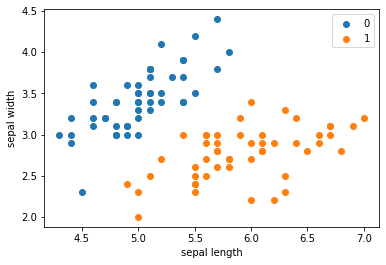

In [6]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label='1')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [7]:
data = np.array(df.iloc[:100, [0, 1, -1]])
x, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [8]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [9]:
perceptron = Model()
perceptron.fit(x, y)

'Perceptron Model!'

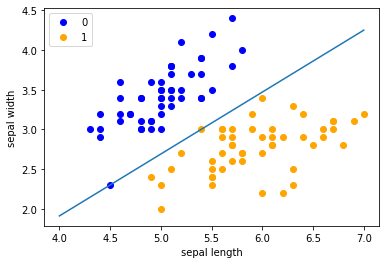

In [10]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.plot(x_points, y_)

You can also do it with the sklearn

In [17]:
import sklearn
from sklearn.linear_model import Perceptron

In [18]:
clf = Perceptron(fit_intercept=True,max_iter=1000,shuffle=True)
clf.fit(x,y)

Perceptron()

In [19]:
clf.coef_

array([[ 23.2, -38.7]])

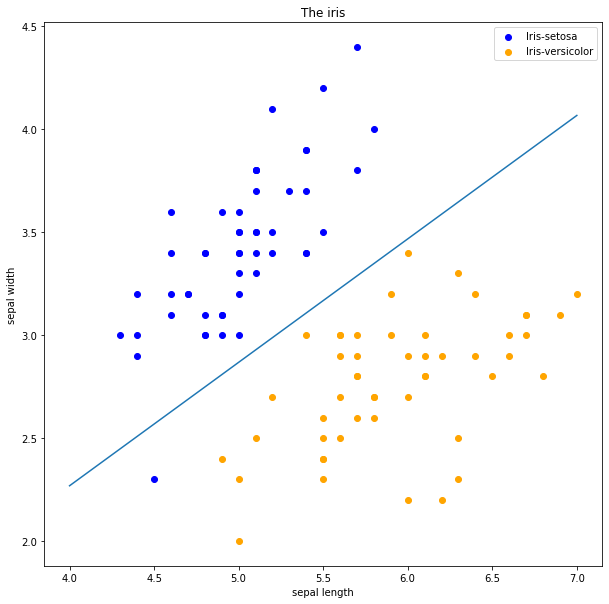

In [21]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.title('The iris')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
